In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving shoe.xlsx to shoe.xlsx


In [4]:
from google.colab import files
uploaded = files.upload()

Saving Logistic Regression.jpg to Logistic Regression.jpg


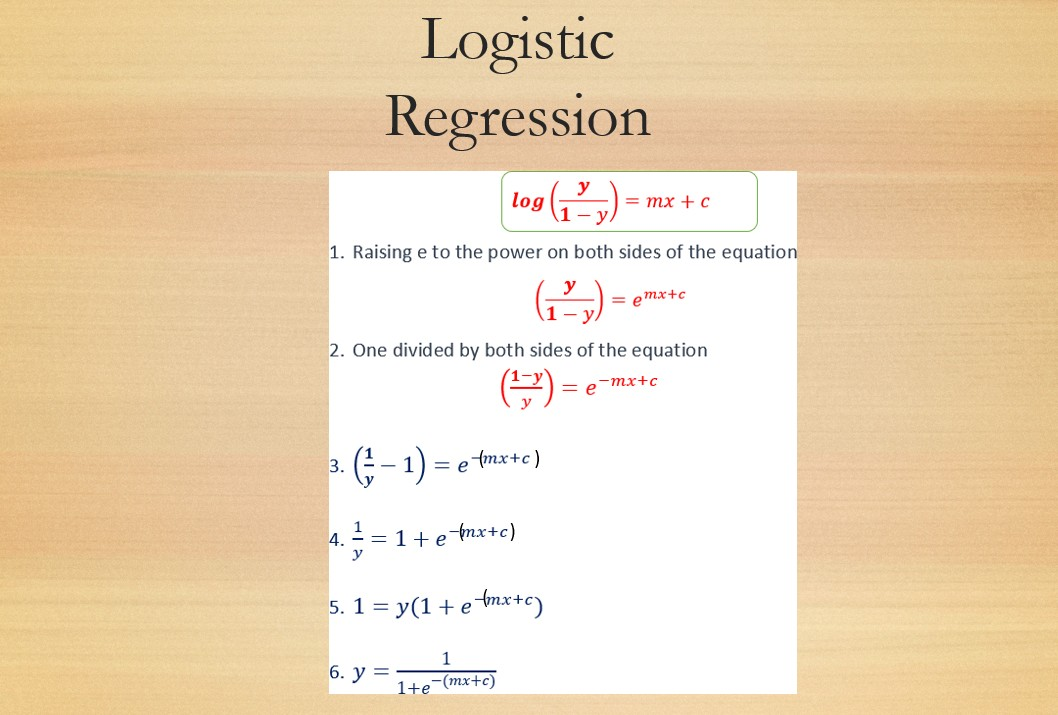

In [5]:
from IPython.display import Image, display
display(Image(filename='Logistic Regression.jpg'))

In [6]:
df =pd.read_excel("shoe.xlsx")

In [7]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


In [11]:
df.shape

(40, 2)

In [12]:
df.isnull().sum()

,0
size(cm),0
class(y),0


In [13]:
df.describe()


,size(cm)
count,40.000000
mean,10.067375
std,0.532646
min,9.150000
25%,9.615000
50%,10.137500
75%,10.482500
max,11.050000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   size(cm)  40 non-null     float64
 1   class(y)  40 non-null     object 
dtypes: float64(1), object(1)
memory usage: 772.0+ bytes


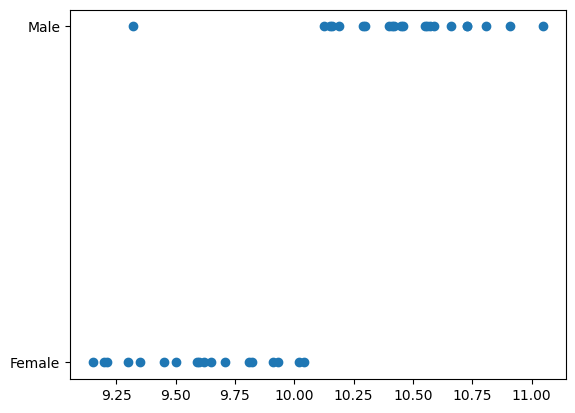

In [15]:
plt.scatter(df['size(cm)'], df['class(y)'])

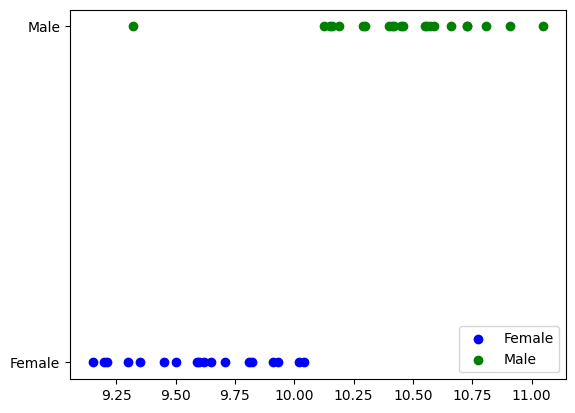

In [17]:
df0 = df[df['class(y)'] =='Female']
df1 =df[df['class(y)'] == 'Male']
plt.scatter(df0['size(cm)'],df0['class(y)'],color = 'blue',label ='Female')
plt.scatter(df1['size(cm)'],df1['class(y)'],color = 'Green',label ='Male')
plt.legend()

# Prepeocessing

In [18]:
df['class(y)'] = df['class(y)'].replace(['Male','Female'],[1,0])


In [19]:
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


# TrainTest Split


In [23]:
from sklearn.model_selection import train_test_split as tts

In [24]:
x_train,x_test,y_train,y_test = tts(df[['size(cm)']],df['class(y)'],test_size=0.3,random_state=81)


In [25]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((28, 1), (12, 1), (28,), (12,))

In [26]:
x_train.head()

,size(cm)
36,9.21
14,10.55
34,10.16
25,10.46
12,10.19


In [28]:
y_train.head()

,class(y)
36,0
14,1
34,1
25,1
12,1


# Logistic Regression


In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
reg=LogisticRegression()

In [31]:
reg.fit(x_train,y_train)

LogisticRegression()

In [32]:
m = reg.coef_
m

array([[2.09627341]])

In [33]:
c=reg.intercept_
c

array([-20.62268346])

In [64]:
reg.predict_proba(x_test)

array([[0.59715986, 0.40284014],
       [0.17727402, 0.82272598],
       [0.56656958, 0.43343042],
       [0.23531121, 0.76468879],
       [0.27509329, 0.72490671],
       [0.4622256 , 0.5377744 ],
       [0.7919909 , 0.2080091 ],
       [0.69272707, 0.30727293],
       [0.13350351, 0.86649649],
       [0.66997811, 0.33002189],
       [0.45182206, 0.54817794],
       [0.15140918, 0.84859082]])

In [53]:
pred=reg.predict(x_test)
pred

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1])

In [42]:
y_test.head(9)

,class(y)
9,0
7,1
8,0
32,1
18,1
31,0
22,0
6,0
29,1


In [58]:
Log_score=reg.score(x_test,y_test)
Log_score

0.8333333333333334

In [75]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,pred)
acc

0.8333333333333334

In [63]:
mae1=mean_absolute_error(y_test,pred)
mae1

0.16666666666666666

In [60]:
mse1=mean_squared_error(y_test,pred)
mse1

0.16666666666666666

In [76]:
data = {'Name':['Logistic_mae','Logistic_mse','Logistic_accuracy'],'Accuracy' : [mae1,mse1,Log_score]}
df_after_pred = pd.DataFrame(data = data)

In [79]:
df_after_pred.head()

,Name,Accuracy
0,Logistic_mae,0.166667
1,Logistic_mse,0.166667
2,Logistic_accuracy,0.833333


In [80]:
import seaborn as sns

<Axes: xlabel='Accuracy', ylabel='Name'>

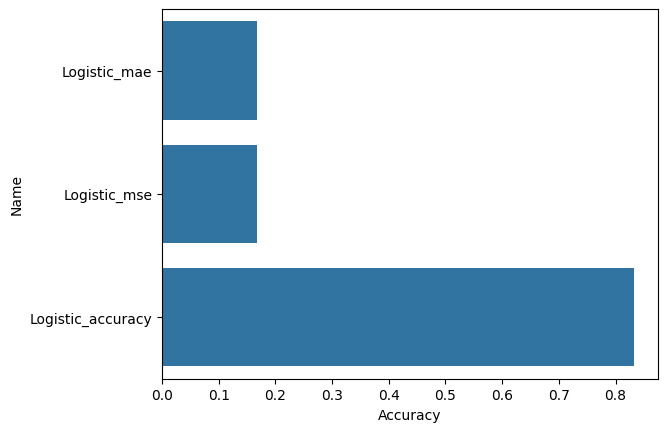

In [81]:
sns.barplot(x='Accuracy',y='Name',data=df_after_pred)